In [ ]:
#@title install packages
!pip install watermark
!pip install japanize-matplotlib
# !pip install numpyro==0.8.0
!pip install numpyro
# !pip install jax==0.2.21
!pip install jax


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=b6e070c8a315cf53d95d08cf43fb255389b849eed4febcc3274dbaa4b2329416
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.2/330.2 kB 2.4 MB/s eta 0:00:00


In [ ]:

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az


import jax.numpy as jnp
import jax.random as random
"""
import numpyro
from numpyro import handlers
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive
"""

'\nimport numpyro\nfrom numpyro import handlers\nimport numpyro.distributions as dist\nfrom numpyro.infer import MCMC, NUTS, Predictive\n'

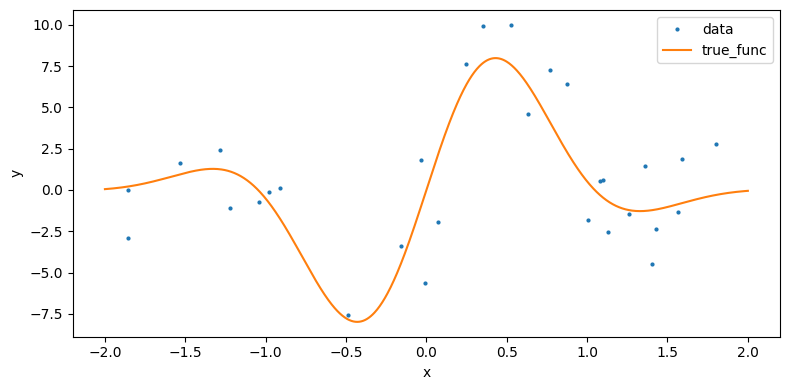

In [ ]:

np.random.seed(20)

# データ数
N = 30

# 目的変数生成関数
def make_data(x, eps):
  y = 10*np.sin(3*x) * np.exp(-x**2)
  noise = np.random.normal(0, eps, size=x.shape[0])
  return y+ noise

# 説明変数をサンプリング
x_data = np.random.uniform(low=-2., high=2., size=N)
# 目的変数生成
y_data =  make_data(x_data, 2.0)
# 関数可視化用説明変数
x_linspace = np.linspace(-2., 2., 1000)
# 関数可視化用目的変数
y_linspace = make_data(x_linspace, 0.0)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x_data, y_data, 'o', markersize=2, label='data');
ax.plot(x_linspace, y_linspace, label='true_func')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.tight_layout();

## NN
- backpropagation
- maximum likelihood method
- pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

#dim of hidden layer
h1,h2 = 10,10

#model definition
class NN_Model(nn.Module):
  def __init__(self,h1=h1,h2=h2):
    super(NN_Model,self).__init__()
    self.fc1 = nn.Linear(1,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,1)
    self.relu = F.relu

  def forward(self,x):
    x = x.reshape(-1,1)
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    y = self.fc3(x)
    return y

#instance
model_torch = NN_Model()

Text(0, 0.5, 'loss')

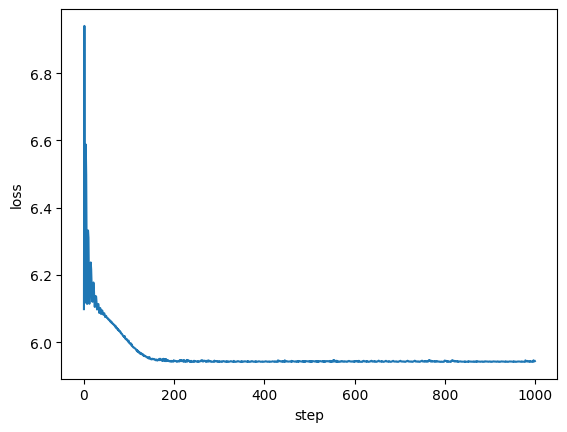

In [ ]:
#optimizer
optimizer = torch.optim.Adam(model_torch.parameters(),lr=0.03)
#loss funcion
loss_func = nn.MSELoss()
#convert to tensor
x_data = torch.from_numpy(x_data).float().unsqueeze(-1) #(N,1)
y_data = torch.from_numpy(y_data).float().unsqueeze(-1)

#train
n_epoch = 1000
loss_list = []
for epoch in range(n_epoch):
  #init
  optimizer.zero_grad()
  #forward
  pred = model_torch.forward(x_data)
  #loss
  loss = loss_func(pred,y_data)
  #backward
  loss.backward()
  #update
  optimizer.step()

  loss_list.append(loss.detach().numpy())

#visualize
plt.plot(loss_list)
plt.xlabel("step")
plt.ylabel("loss")

#

## Prediction

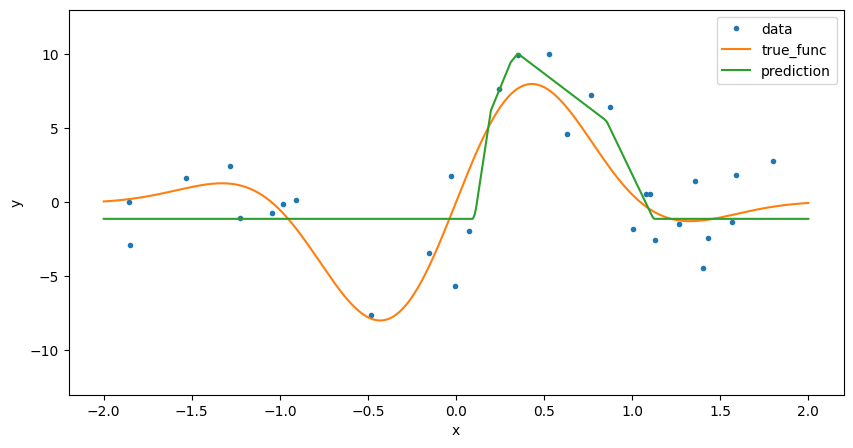

In [ ]:
x_new = torch.linspace(-2,2,1000).unsqueeze(-1)
pred_torch = model_torch.forward(x_new)


fig, ax = plt.subplots(figsize=(10, 5))
# データ可視化
ax.plot(x_data, y_data, 'o', markersize=3, label='data')
# 真の関数可視化
ax.plot(x_linspace, y_linspace, label='true_func')
# 予測値可視化
ax.plot(x_new, pred_torch.detach().numpy(), label='prediction')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim(-13 ,13)
ax.legend();